(morphometrie-chapitre)=
# Analyses morphométriques

<table>
  <tr>
    <td align="center">
      <a href="https://github.com/eddyfortier">
        <img src="https://avatars.githubusercontent.com/u/72314243?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Eddy Fortier</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Révision du texte">👀</a>
    </td>
    <td align="center">
      <a href="https://github.com/me-pic">
        <img src="https://avatars.githubusercontent.com/u/77584086?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Marie-Eve Picard</b></sub>
      </a>
      <br />
        <a title="Révision du texte">👀</a>
    </td>
    <td align="center">
      <a href="https://github.com/pbellec">
        <img src="https://avatars.githubusercontent.com/u/1670887?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Pierre bellec</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
        <a title="Quizz">⚠️</a>
        <a title="Révision du texte">👀</a>
        <a title="Code">💻</a>
        <a title="Quiz">⚠️</a>
    </td>
  </tr>
</table>

## Objectifs du cours

Ce cours introduit différentes approches pour quantifier la morphologie du cerveau à l'aide des données d'imagerie par résonance magnétique anatomique. Il sera question dans ce chapitre de trois grandes approches d'analyse:
 * la **volumétrie**, qui vise à mesurer la taille d'une région cérébrale;
 * la **morphométrie basée sur les voxels (*voxel-based morphometry* ou VBM)**, qui vise à mesurer le volume de matière grise locale pour chaque voxel dans le cerveau;
 * les **analyses de surface**, qui exploitent la structure en ruban de la matière grise pour mesurer l'épaisseur et la surface corticale.

On parlera également d'étapes d'analyse d'images utiles pour l'ensemble de ces techniques: le **recalage**, la **segmentation**, le **lissage** et le **contrôle de qualité**.

## Morphométrie

```{figure} ./morphometrie/morphometrie_durer.jpg
---
width: 600px
name: morphometrie-durer-fig
---
Étude de Dürer sur les proportions du visage.
Image appartenant au domaine public, tirée de [wikimedia](https://commons.wikimedia.org/wiki/File:Morpho_durer.JPG).
```

En neurosciences, la [morphométrie](https://fr.wikipedia.org/wiki/Morphom%C3%A9trie) est l'étude de la forme du cerveau et de ses structures.
Le terme morphométrie combine deux termes tirés du grec ancien: *morphos* (forme) et *métron* (mesure).
La morphométrie est donc la "mesure" de la "forme".
Pour mesurer la forme du cerveau, il est nécessaire de pouvoir observer clairement les délimitations neuroanatomiques.
L'IRM anatomique nous donne un bon contraste entre matière grise, matière blanche et liquide céphalo-rachidien.
Combinée avec des outils automatiques d'analyse d'images, l'IRM permet donc de réaliser des études de morphologie computationnelle.

```{figure} ./morphometrie/ledig2018.webp
---
width: 600px
name: ledig2018-fig
---
Cette figure illustre des différences morphologiques entre des individus présentant des profils cliniques différents: sans atteinte cognitive (haut), troubles légers de la cognition (milieu), démence de type Alzheimer (bas).
Par ailleurs, il est également possible d'observer des différences longitudinales au sein d'un même individu (de gauche à droite, visite initiale, suivi après deux ans, différence entre les deux images).
Figure tirée de {cite:p}`Ledig2018-ai`, sous licence CC-BY.
```

Comme le démontre la figure ci-haut, les études morphologiques IRM permettent de comparer des individus et des groupes.
De telles comparaisons peuvent nous informer sur l'effet de l'âge, ou bien encore l'effet d'une lésion ou d'une maladie sur la forme du cerveau.

## Volumétrie

### Segmentation manuelle

```{figure} ./morphometrie/ashempour2019.jpg
---
width: 600px
name: ashempour2019-fig
---
Cette figure illustre un protocole de segmentation manuelle de l'amygdale.
Vue coronale d'une segmentation manuelle de l'amygdale gauche (jaune) et droit (bleu) avant (gauche) et après (droite) avoir procédé aux corrections dans le plan coronal.
Figure tirée de {cite:p}`Hashempour2019-jq`, sous licence CC-BY.
```

La **volumétrie manuelle** consiste à délimiter visuellement une aire cérébrale particulière, comme l'hippocampe ou l'amygdale (voir {numref}`ashempour2019-fig`).
Cette approche nécessite du temps, car le contour des structures d'intérêt doit être dessiné à la main sur chaque coupe d'IRM.
On commence d'abord par segmenter une structure dans un premier plan de coupe (par exemple, dans le plan axial), puis il faudra aller corriger cette segmentation dans les autres plans (par exemple, dans le plan sagittal, puis dans le plan coronal).

> Pour un rappel concernant les différents types de coupes du cerveau, veuillez vous référer au [Chapitre 1: Cartes cérébrales](<coupes-tip>).

Afin de déterminer où une région cérébrale se situe, ce type d'approche nécessite également un protocole de segmentation avec des critères anatomiques clairs.
Pour certaines structures, comme pour l'hippocampe, il existe des protocoles détaillés (par exemple: {cite:p}`Wisse2017-ff`).
Mais pour d'autres régions, comme les aires visuelles (V1, V2, etc.), il est nécessaire de réaliser des expériences fonctionnelles afin de pouvoir les délimiter.
En effet, dans ce dernier cas, les délimitations anatomiques ne sont pas toujours disponibles ou bien établies.

Un protocole de segmentation rigoureux est nécessaire pour obtenir un bon niveau de [concordance](https://en.wikipedia.org/wiki/Inter-rater_reliability) des résultats entre différents chercheurs (accord inter-juges).
Certains protocoles proposent aussi un processus de certification, ce qui offre une garantie que la personne effectuant la segmentation applique le protocole correctement.

### Segmentation automatique

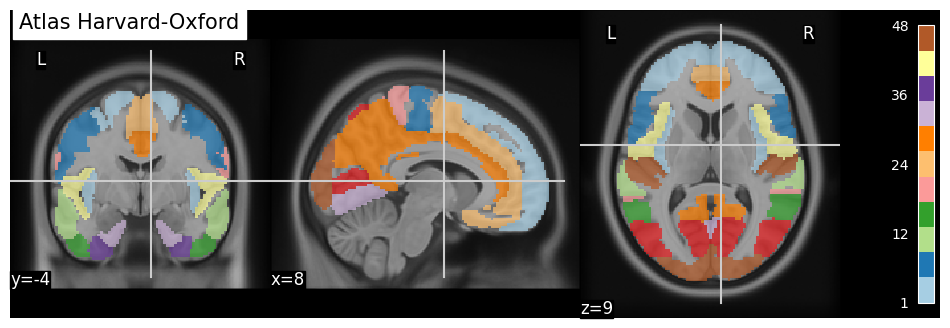

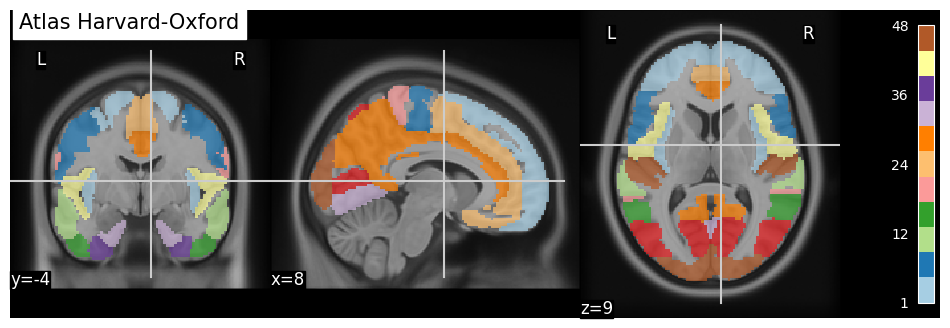

In [1]:
# Téléchargement de l'atlas Harvard-Oxford
from nilearn import datasets

# Enlève les warnings
import warnings
warnings.filterwarnings("ignore")

atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm').maps
mni = datasets.fetch_icbm152_2009()

# Visualisation de la figure
import matplotlib.pyplot as plt
from myst_nb import glue
from nilearn import plotting

fig = plt.figure(figsize=(12, 4))
plotting.plot_roi(atlas,
    bg_img=mni.t1,
    axes=fig.gca(),
    title="Atlas Harvard-Oxford",
    cut_coords=(8, -4, 9),
    colorbar=True,
    cmap='Paired')

glue("harvard-oxford-fig", fig, display=False)

```{glue:figure} harvard-oxford-fig
:figwidth: 800px
:name: "harvard-oxford-fig"

Un exemple d'atlas de régions anatomiques: l'atlas Harvard-Oxford.
Cette figure est générée par du code python à l'aide de la librairie [nilearn](https://nilearn.github.io/) à partir d'un jeu de données public appelé fetch_atlas_harvard_oxford ([Nilearn, section 9.2.1: Basic Atlas plotting](https://nilearn.github.io/auto_examples/01_plotting/plot_atlas.html)) {cite:p}`MAKRIS2006155, Frazier2005, DESIKAN2006968, GOLDSTEIN2007935` (cliquer sur + pour voir le code).
```

Afin d'automatiser le travail de segmentation, il est possible d'utiliser un atlas, c'est-à-dire une segmentation déjà effectuée par une équipe de chercheurs.
Pour ce faire, ceux-ci ont construit une carte des régions d'intérêt à l'intérieur d'un espace de référence, aussi appelé {ref}`espace stéréotaxique <stereotaxique-tip>`.
Il existe une variété d'atlas basés sur différents critères anatomiques ou fonctionnels, il est donc important de choisir adéquatement l'atlas en fonction des structures étudiées.
Afin d'ajuster l'atlas sur les données d'un participant, les images structurelles de ce dernier sont d'abord {ref}`recalées <registration-tip>` de manière automatisée vers l'{ref}`espace stéréotaxique <stereotaxique-tip>` de référence.
Cette transformation permet par la suite d'adapter l'atlas à l'anatomie de chaque sujet.

```{admonition} Le recalage
:class: tip
:name: registration-tip

Afin d'appliquer un atlas de régions cérébrales sur une IRM individuelle, ou plus généralement mettre en correspondance deux images de cerveaux, il est nécessaire de recaler cette IRM sur l'espace stéréotaxique qui a été utilisé pour établir les régions.
Ce processus mathématique va chercher à déformer l'image individuelle afin de l'ajuster à l'espace stéréotaxique.
Cette transformation peut être affine (incluant notamment translation, rotation et mise à l'échelle) ou bien non-linéaire (déplacement dans n'importe quelle direction de l'espace).
L'objectif du recalage est d'augmenter le niveau de similarité entre les images, mais il est aussi important que les déformations soient continues.
Autrement dit, des endroits adjacents dans les images non-recalées doivent toujours être adjacents après le recalage.
Les images ci-dessous illustrent l'effet de différents types de recalage.
Elles sont tirées de la documentation du logiciel [slicer](https://www.slicer.org/wiki/Documentation:Nightly:Registration:RegistrationLibrary:RegLib_C42), sous licence CC-Attributions Share Alike.

```{figure} morphometrie/registration_slicer_raw.gif
:figwidth: 400px
:align: left
Images brutes: deux scans du même sujet, prises durant deux séances d'acquisition différentes.

```{figure} morphometrie/registration_slicer_affine.gif
:figwidth: 400px
:align: left
:figclass: margin-caption
Images recalées par un processus de transformation affine seulement.

```{figure} morphometrie/registration_slicer_nonlinear.gif
:figwidth: 400px
:align: left
:figclass: margin-caption
Images recalées par une transformation affine suivie d'une transformation non-linéaire.

```{figure} morphometrie/registration_slicer_nonlinear_only.gif
:figwidth: 400px
:align: left
:figclass: margin-caption
Visualisation des effets du recalage non-linéaire seulement.
```

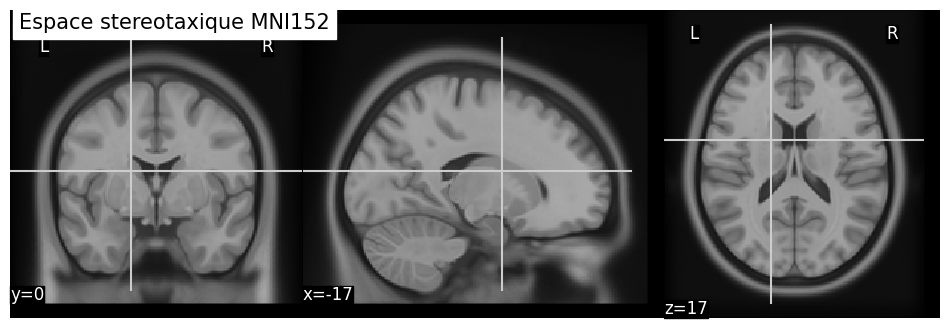

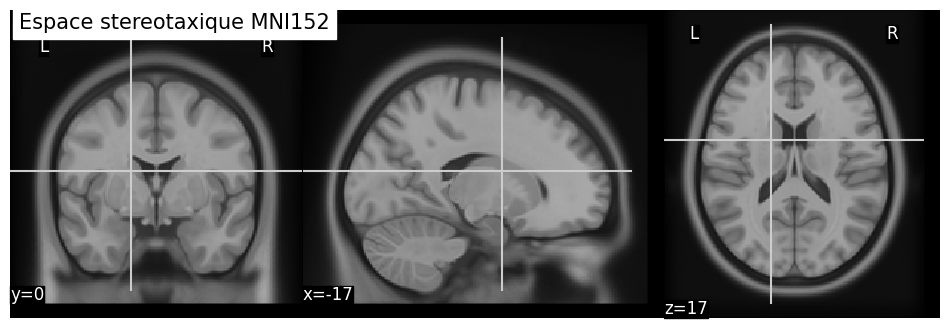

In [2]:
# Ce code récupère des données IRM T1
# et génère une image dans trois plans de coupes

# Enlève les warnings
import warnings
warnings.filterwarnings("ignore")

# Télécharge un scan anatomique (template MNI152)
from nilearn.datasets import fetch_icbm152_2009
mni = fetch_icbm152_2009()

# Visualise le volume cérébral
import matplotlib.pyplot as plt
from myst_nb import glue
from nilearn.plotting import plot_anat

fig = plt.figure(figsize=(12, 4))
plot_anat(
  mni.t1,
  axes=fig.gca(),
  cut_coords=[-17, 0, 17],
  title='Espace stereotaxique MNI152'
)
glue("mni-template-fig", fig, display=False)

```{admonition} Espace stéréotaxique
:class: tip
:name: stereotaxique-tip

Afin de définir une anatomie de référence, les chercheurs utilisent généralement un cerveau "moyen".
Pour y parvenir, les cerveaux de plusieurs dizaines d'individus sont recalés les uns avec les autres, puis moyennés jusqu'à obtenir une seule image.
Si le recalage a bien fonctionné, comme dans le cas de l'atlas MNI152 ci-dessous, les détails de la neuroanatomie sont préservés dans la moyenne.
```{glue:figure} mni-template-fig
:figwidth: 600px
:align: left
Espace stéréotaxique de l'Institut Neurologique de Montréal (MNI).
Cette espace de référence a été obtenu en faisant la moyenne des images cérébrales de 152 sujets après avoir procédé à un recalage non-linéaire itératif {cite:p}`Fonov2011-xr`.
```

### Analyses statistiques
```{figure} ./morphometrie/ledig2018_stats.png
---
width: 400px
name: ledig2018-stats-fig
---
Cette figure illustre les différences de volume de l'hippocampe entre des participants cognitivement sains (HC), des participants présentant des troubles cognitifs légers stables (sMCI) ou progressifs (pMCI), ainsi que des patients atteints d'une démence de type Alzheimer (AD), dans la cohorte ADNI.
Plus les symptômes cliniques sont sévères, plus la probabilité de présenter la maladie d'Alzheimer est grande, et plus le stade d'avancement de la maladie est sévère.
L'atrophie de l'hippocampe est claire chez les patients présentant les symptômes les plus sévères.
Figure tirée de {cite:p}`Ledig2018-ai`, sous licence CC-BY.
```
Afin de procéder aux analyses statistiques, on extrait d'abord le volume de chaque structure segmentée (en $mm^3$).
On peut ensuite comparer statistiquement le volume moyen entre deux groupes, par exemple, ou encore tester l'association entre le volume et une autre variable, comme l'âge.
Dans l'exemple de la {numref}`ledig2018-stats-fig`, on compare le volume de l'hippocampe entre différents groupes cliniques ayant différents niveaux de risques liés à la maladie d'Alzheimer.

### Contrôle de qualité
```{figure} ./morphometrie/artefact-fig.png
---
width: 600px
name: artefact-fig
---
La présence de métal ou d'éléments défectueux dans le scanner peuvent causer des artefacts et des distorsions dans les images qui ne reflètent pas la morphologie réelle de la tête.
Figure d'origine inconnue, possiblement sous droits réservés.
```
```{figure} ./morphometrie/qc-fail-fig.png
---
width: 600px
name: qc-fail-fig
---
Le recalage peut parfois échouer de manière spectaculaire.
Ici, la forme rouge indique le pourtour attendu du cerveau et de certains repères anatomiques.
L'IRM individuelle recalée n'est pas du tout alignée avec les repères attendus.
Figure par P. Bellec, sous licence CC-BY.
```

Il est possible d'obtenir des résultats aberrants en volumétrie, soit à cause de la présence d'erreurs dans les étapes de recalage linéaire et/ou non-linéaire ({numref}`qc-fail-fig`), soit à cause d'artefacts lors de l'acquisition des données (présence d'objets métalliques, etc. {numref}`artefact-fig`). Les images peuvent également être de mauvaise qualité si le sujet de recherche bouge pendant l'acquisition.
Il est important d'effectuer un contrồle de qualité afin d'éliminer les images inutilisables avant de procéder aux analyses statistiques.
Conserver ces dernières pourrait avoir des impacts importants sur les résultats ainsi que sur les conclusions tirées.

## VBM

### Densité de matière grise
La morphométrie basée sur les voxels (*voxel-based morphometry* ou VBM) a pour objectif de mesurer le volume de matière grise situé immédiatement autour d'un voxel donné.
Cette approche n'est donc pas limitée par le besoin d'avoir des frontières préétablies claires entre différentes structures cérébrales.
Lorsque l'on génère une mesure de volume pour l'ensemble des voxels du cerveau à l'aide de ce genre de technique, on obtient une carte 3D de la densité de la matière grise.
Les principaux avantages de cette approche sont ses aspects automatisés et systématiques.
La présence d'une personne ne devient nécessaire que pour vérifier que la procédure a fonctionné correctement: c'est l'étape du contrôle de qualité (ou QC, pour "quality control").
On va aussi tester la morphologie du cerveau à travers l'ensemble de la matière grise.
D'un autre côté, cette technique comporte aussi un inconvénient important.
En effet, le grand nombre de mesures générées pose un problème de _comparaisons multiples_ lorsque vient le temps de faire les analyses statistiques (voir le [Chapitre 9: Cartes statistiques](cartes-statistiques-chapitre)).

### Segmentation

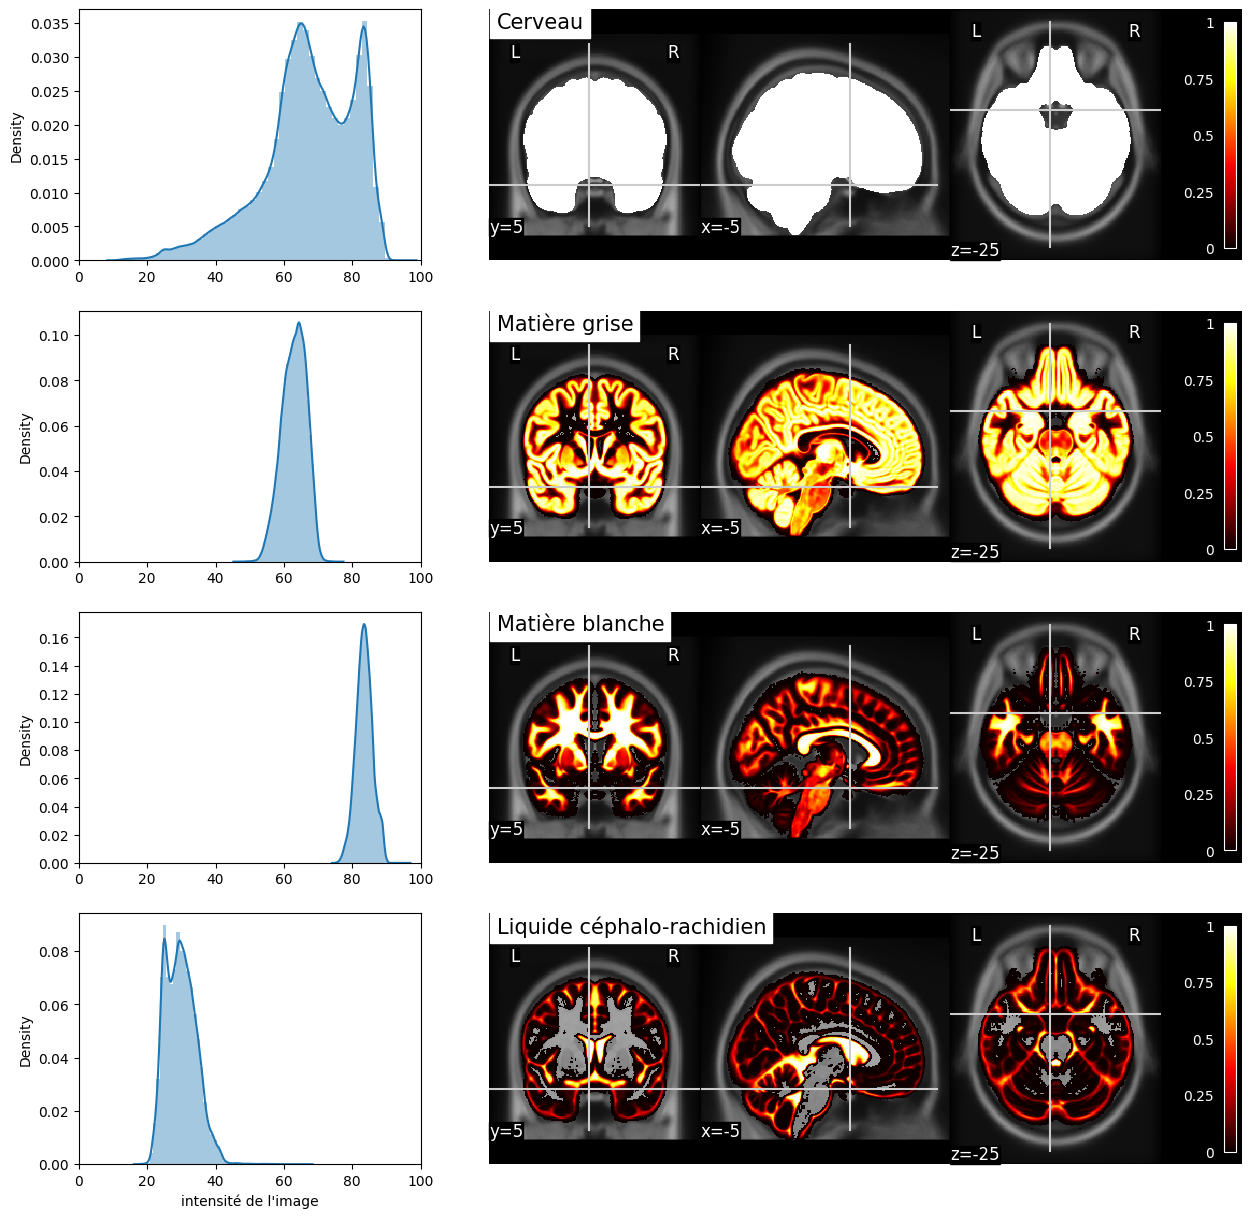

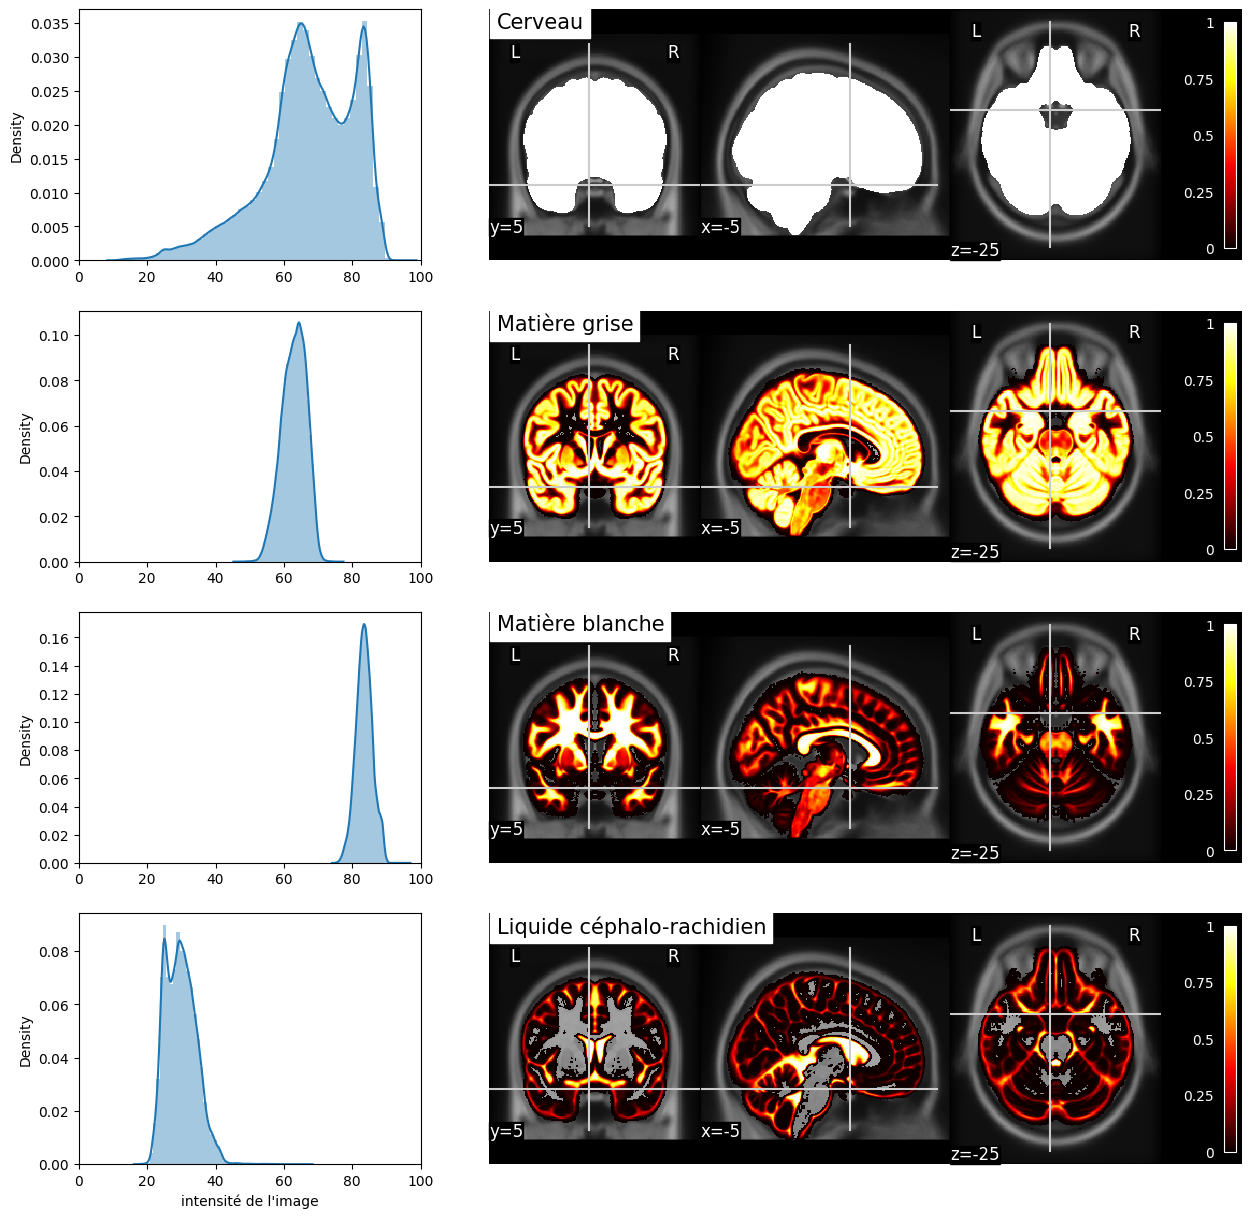

In [3]:
# Importe les librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Télécharge un scan anatomique (template MNI152)
from nilearn import datasets
mni = datasets.fetch_icbm152_2009()

# Initialise la figure
fig = plt.figure(figsize=(15, 15))

from nilearn.plotting import plot_stat_map
from nilearn.image import math_img
from nilearn.input_data import NiftiMasker

thresh = 0.8
coords = [-5, 5, -25]

# Full brain
ax_plot = plt.subplot2grid((4, 3), (0, 0), colspan=1)
mask_brain = math_img(f"img>{thresh}", img=mni.mask)
val_brain = NiftiMasker(mask_img=mask_brain).fit_transform(mni.t1)
ax = sns.distplot(val_brain, norm_hist=False)
ax.set_xlim(left=0, right=100)
ax_plot = plt.subplot2grid((4, 3), (0, 1), colspan=2)
plot_stat_map(mni.mask,
              bg_img=mni.t1,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title='Cerveau'
              )

# Gray matter
ax_plot = plt.subplot2grid((4, 3), (1, 0), colspan=1)
mask_gm = math_img(f"img>{thresh}", img=mni.gm)
val_gm = NiftiMasker(mask_img=mask_gm).fit_transform(mni.t1)
ax = sns.distplot(val_gm, norm_hist=False)
ax.set_xlim(left=0, right=100)
ax_plot = plt.subplot2grid((4, 3), (1, 1), colspan=2)
plot_stat_map(mni.gm,
              bg_img=mni.t1,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title='Matière grise'
              )

# White matter
ax_plot = plt.subplot2grid((4, 3), (2, 0), colspan=1)
mask_wm = math_img(f"img>{thresh}", img=mni.wm)
val_wm = NiftiMasker(mask_img=mask_wm).fit_transform(mni.t1)
ax = sns.distplot(val_wm, norm_hist=False)
ax.set_xlim(left=0, right=100)
ax_plot = plt.subplot2grid((4, 3), (2, 1), colspan=2)
plot_stat_map(mni.wm,
              bg_img=mni.t1,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title='Matière blanche'
              )

# CSF
ax_plot = plt.subplot2grid((4, 3), (3, 0), colspan=1)
mask_csf = math_img(f"img>{thresh}", img=mni.csf)
val_csf = NiftiMasker(mask_img=mask_csf).fit_transform(mni.t1)
ax = sns.distplot(val_csf, axlabel="intensité de l'image", norm_hist=False)
ax.set_xlim(left=0, right=100)
ax_plot = plt.subplot2grid((4, 3), (3, 1), colspan=2)
plot_stat_map(mni.csf,
              bg_img=mni.t1,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title='Liquide céphalo-rachidien'
              )

from myst_nb import glue
glue("mni-segmentation-fig", fig, display=False)

```{glue:figure} mni-segmentation-fig
:figwidth: 600px
:name: mni-segmentation-fig
Segmentation probabiliste des principaux types de tissus et distribution des valeurs pondérées en T1 dans les voxels "purs" (probabilité supérieure à 80% pour un type de tissu donné).
L'image pondérée en T1 ainsi que les segmentations correspondent à l'espace stéréotaxique MNI152 {cite:p}`Fonov2011-xr`.
```

Une étape importante de la VBM est la segmentation.
Cette analyse vise à catégoriser les types de tissus du cerveau en différentes classes contenant notamment la matière grise, la matière blanche et le liquide céphalo-rachidien.
Un masque du cerveau est généralement extrait afin d'exclure les méninges ainsi que le crâne.
On va généralement y inclure d'autres types de tissus également, comme la graisse.
Un algorithme de segmentation va ensuite examiner la distribution des niveaux de gris dans l'image (par exemple, dans une image pondérée en T1) et estimer pour chaque voxel la proportion du voxel qui contient un type de tissu donné.
Cette proportion est souvent appelé l'{ref}`effet de volume partiel <volume-partiel-tip>`.
Un voxel peut par exemple être assigné à 80% de matière grise et 20% de liquide céphalo-rachidien.
Le niveau de gris résultant pourrait alors donner une indication trompeuse sur son contenu réel.

```{admonition} Effet de volume partiel
:class: tip
:name: volume-partiel-tip
Il est possible que la segmentation automatique nous retourne pour certains tissus non-désirés des valeurs similaires à celle de la matière grise sur l'image résultant de cette étape.
En effet, il est possible que des voxels se trouvant directement sur la jonction entre une zone blanche et une zone noire (par exemple, sur une paroi de matière blanche qui borderait un ventricule) aient comme valeur résultante une valeur s'apparentant plutôt au gris associé à la matière grise (valeur moyenne entre blanc et noir).
On appelle ce genre d'effet de mélange de noir et de blanc un volume partiel (une partie du volume du voxel est blanche alors que l'autre partie est noire).
```

### Lissage

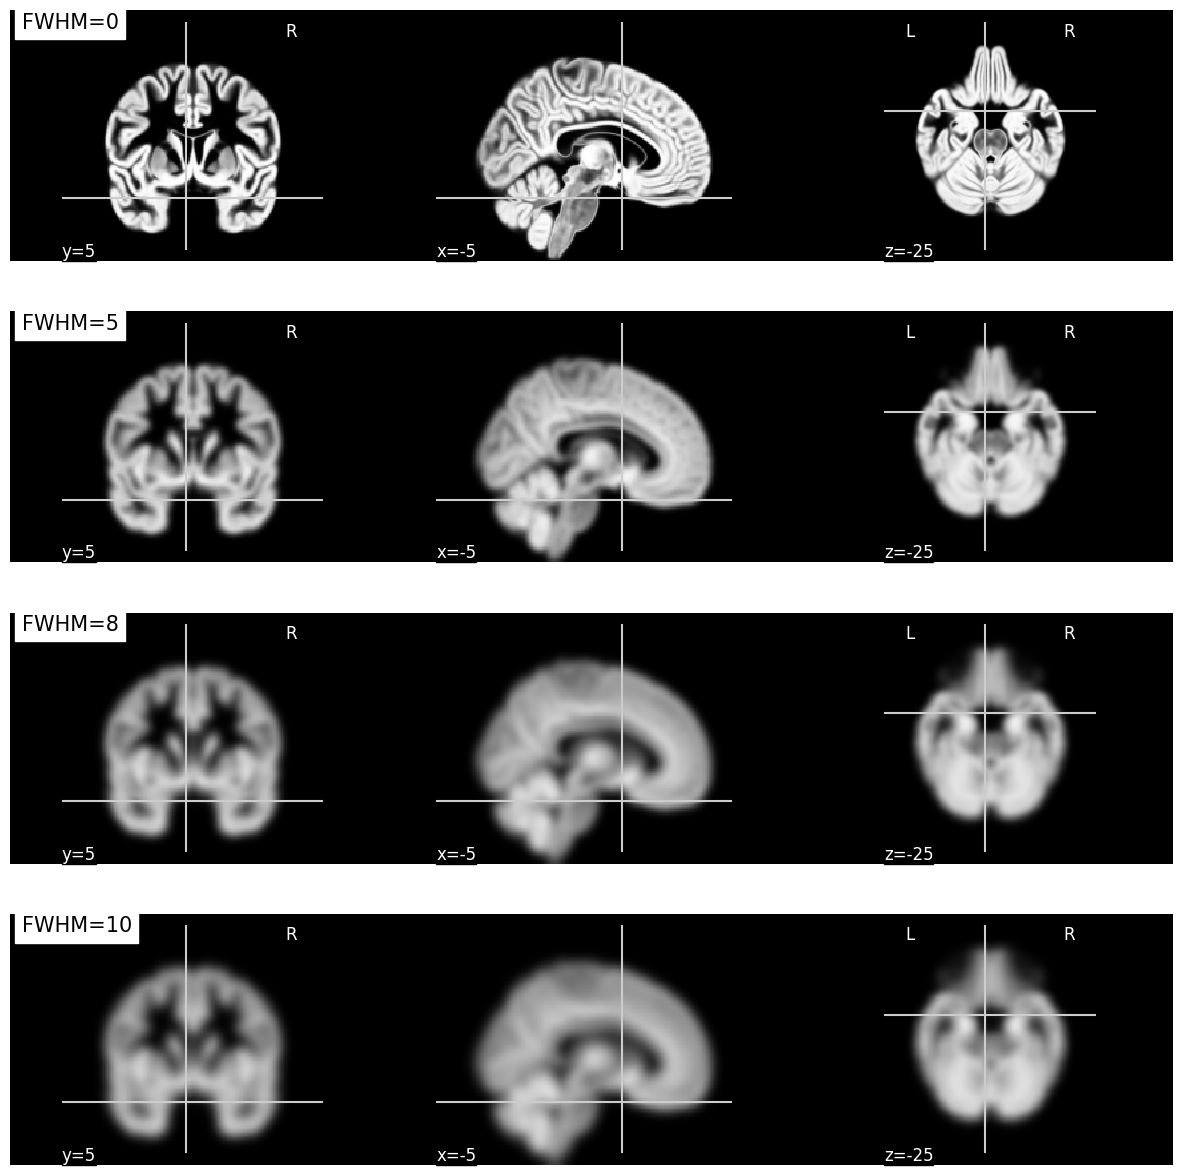

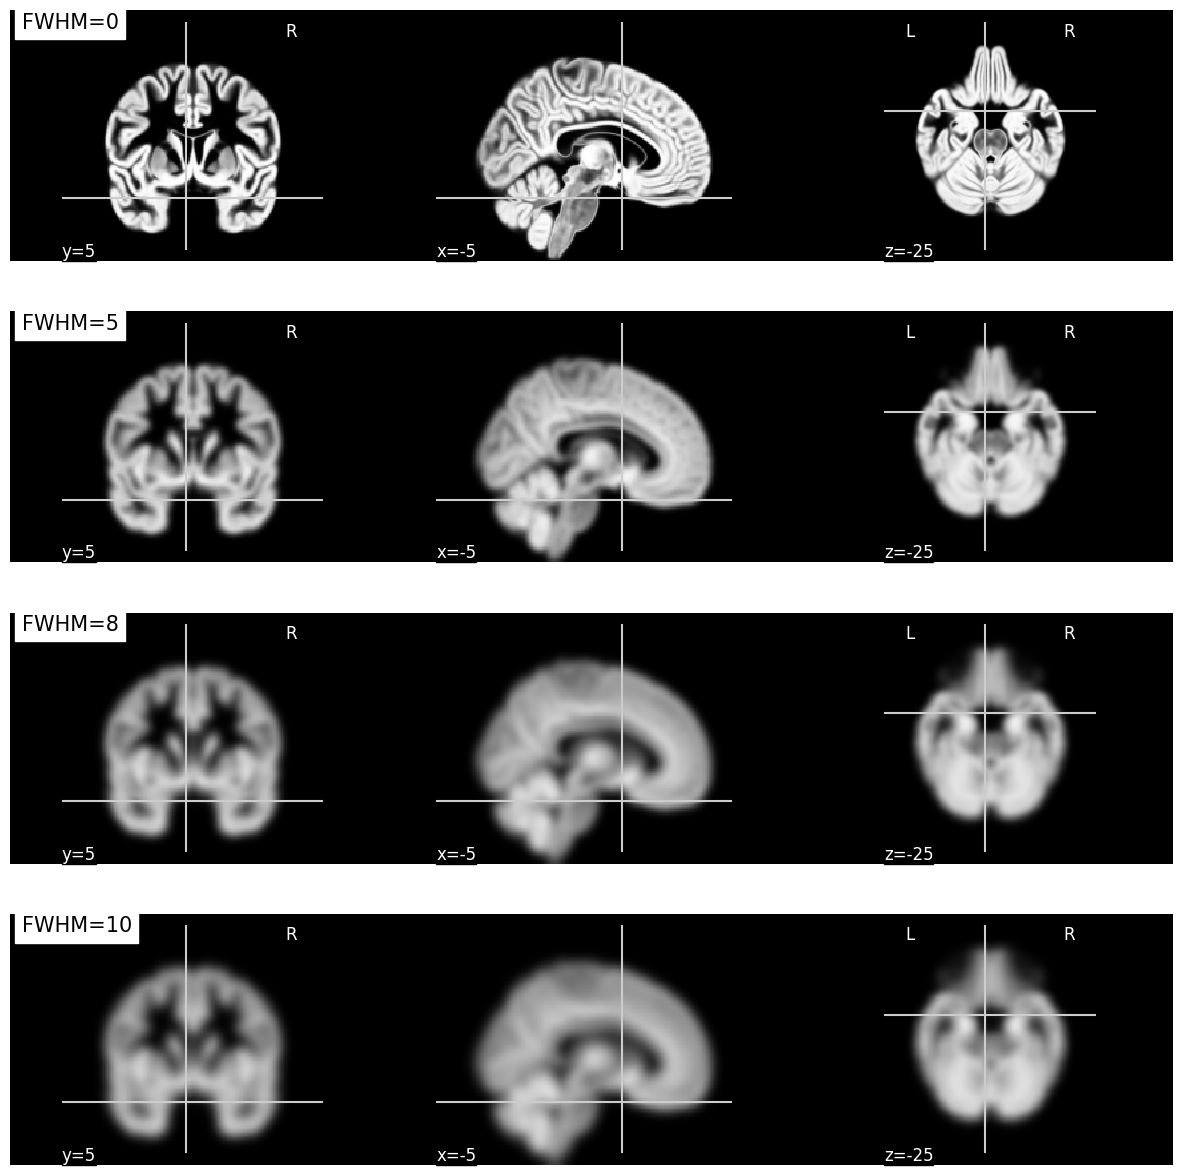

In [4]:
# Importe les librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np
from myst_nb import glue
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Télécharge un scan anatomique (template MNI152)
from nilearn import datasets
mni = datasets.fetch_icbm152_2009()

# Initialise la figure
fig = plt.figure(figsize=(15, 15))

from nilearn.plotting import plot_anat
from nilearn.image import math_img
from nilearn.input_data import NiftiMasker
from nilearn.image import smooth_img

list_fwhm = (0, 5, 8, 10)
n_fwhm = len(list_fwhm)
coords = [-5, 5, -25]

for num, fwhm in enumerate(list_fwhm):
    ax_plot = plt.subplot2grid((n_fwhm, 1), (num, 0), colspan=1)
    vol = smooth_img(mni.gm, fwhm)
    plot_anat(vol,
              cut_coords=coords,
              axes=ax_plot,
              black_bg=True,
              title=f'FWHM={fwhm}',
              vmax=1)

from myst_nb import glue
glue("smoothing-fig", fig, display=False)

```{glue:figure} smoothing-fig
:figwidth: 600px
:name: smoothing-fig
Illustration de l'impact du lissage sur une carte de densité de matière grise en VBM.
À mesure que le paramètre `FWHM` augmente, la mesure de la densité représente une région entourant le voxel de plus en plus grande.
Cette figure est générée par du code python à l'aide de la librairie [nilearn](https://nilearn.github.io/) à partir d'un jeu de données public appelé template MNI152 2009 {cite:p}`Fonov2011-xr` (cliquer sur + pour voir le code).
```

L'étape suivante correspond au *lissage spatial*.
Celui-ci consiste à ajouter un filtre sur l'image qui va la rendre plus floue.
En pratique, le lissage remplace la valeur associée à chaque voxel par une moyenne pondérée de ses voisins.
Comme c'est une moyenne pondérée, la valeur originale du voxel est celle qui aura la plus grande pondération, mais les valeurs des voxels situés directement autour vont aussi l'affecter grandement.
La valeur des poids suit le profil d'une distribution Gaussienne 3D (plus un voxel voisin est loin du voxel d'intérêt, moins il en affectera la valeur).
Il est nécessaire de procéder à cette étape afin d'obtenir des valeurs de densité de matière grise pour des zones qui dépasse le voxel unique, mais qui représentent plutôt le volume d'une petite région, centrée sur le voxel.
La taille de la région est contrôlée par un paramètre de _largeur à mi-hauteur_, ou `FWHM` (_full width at half maximum_), qui se mesure en millimètres.
Plus la valeur de FWHM est grande, plus grand sera le rayon du voisinage contenant les voxels qui auront un impact sur la valeur lissée du voxel (voir la {numref}`smoothing-fig`).

### Analyses statistiques

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.4s finished


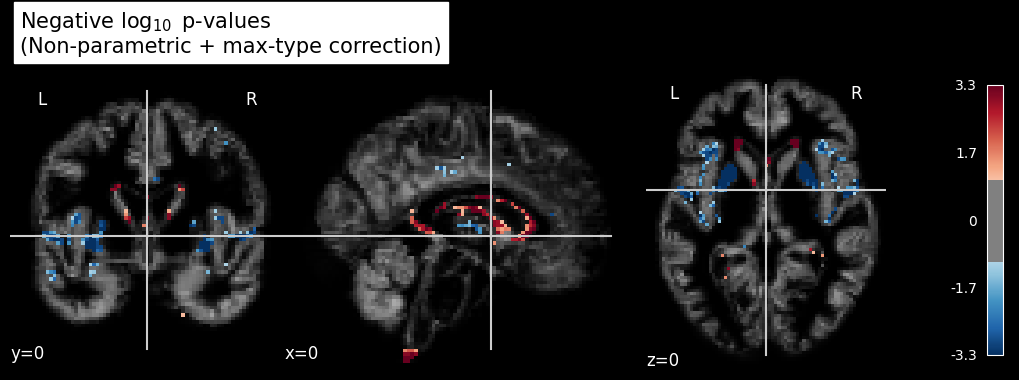

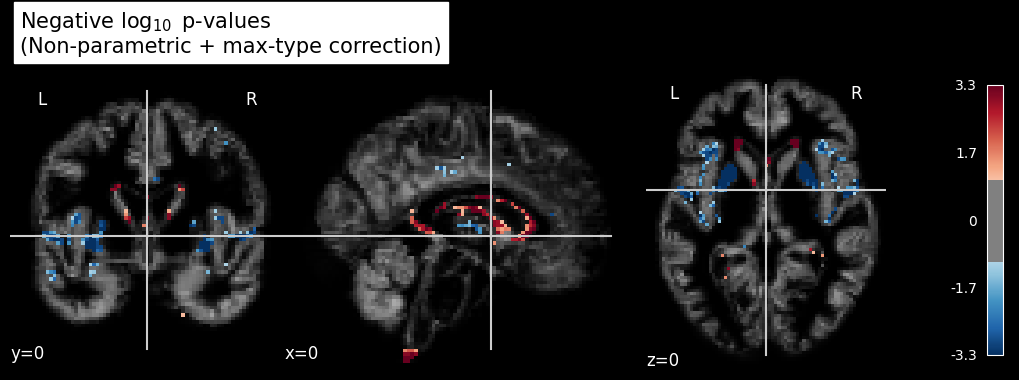

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.input_data import NiftiMasker
from nilearn.image import get_data

n_subjects = 100  # more subjects requires more memory

# Charge les données
oasis_dataset = datasets.fetch_oasis_vbm(n_subjects=n_subjects)
gray_matter_map_filenames = oasis_dataset.gray_matter_maps
age = oasis_dataset.ext_vars['age'].astype(float)

# Prétraitement (mask)
nifti_masker = NiftiMasker(
    standardize=False,
    smoothing_fwhm=2,
    memory='nilearn_cache')  # cache options

# Normalise les données
gm_maps_masked = nifti_masker.fit_transform(gray_matter_map_filenames)

from sklearn.feature_selection import VarianceThreshold
variance_threshold = VarianceThreshold(threshold=.01)

gm_maps_thresholded = variance_threshold.fit_transform(gm_maps_masked)
gm_maps_masked = variance_threshold.inverse_transform(gm_maps_thresholded)
data = variance_threshold.fit_transform(gm_maps_masked)

# Modèle de régression massivement univarié
from nilearn.mass_univariate import permuted_ols
neg_log_pvals, t_scores_original_data, _ = permuted_ols(
    age, data,  # + intercept as a covariate by default
    n_perm=2000,  # 1,000 in the interest of time; 10000 would be better
    verbose=1, # display progress bar
    n_jobs=1)  # can be changed to use more CPUs
signed_neg_log_pvals = neg_log_pvals * np.sign(t_scores_original_data)
signed_neg_log_pvals_unmasked = nifti_masker.inverse_transform(
    variance_threshold.inverse_transform(signed_neg_log_pvals))

# Visualise les résultats
threshold = -np.log10(0.1)  # 10% corrected

fig = plt.figure(figsize=(10, 3), facecolor='k')
bg_filename = gray_matter_map_filenames[0]
cut_coords = [0, 0, 0]
display = plot_stat_map(signed_neg_log_pvals_unmasked, bg_img=bg_filename,
                        threshold=threshold, cmap=plt.cm.RdBu_r,
                        cut_coords=cut_coords,
                        figure=fig)
title = ('Negative $\\log_{10}$ p-values'
         '\n(Non-parametric + max-type correction)')
display.title(title, y=1.2)
plt.show()

from myst_nb import glue
glue("vbm-fig", fig, display=False)

```{glue:figure} vbm-fig
:figwidth: 600px
:name: vbm-fig
Régression linéaire en VBM.
On teste ici l'effet de l'âge sur un groupe (N=50) de participants de la base de données OASIS.
La significativité $-\log_{10}(p)$ de l'effet de l'âge est superposée à une image de densité de matière grise.
Cette figure est adaptée d'un tutoriel [Nilearn](https://nilearn.github.io/auto_examples/02_decoding/plot_oasis_vbm.html#sphx-glr-auto-examples-02-decoding-plot-oasis-vbm-py).
```

Afin de pouvoir comparer les valeurs de densité de matière grise entre les sujets, on utilise la même procédure de {ref}`recalage <registration-tip>` non-linéaire que pour la volumétrie automatique.
Contrairement à la volumétrie manuelle, où chaque volume à l'étude est délimité de façon à représenter la même structure d'intérêt, le recalage utilisé en VBM n'est pas lié à une structure particulière.
Une fois les cartes de densité recalées dans l'espace stéréotaxique de référence, on peut procéder à des tests statistiques à chaque voxel.
Dans l'exemple ci-dessus, on teste l'effet de l'âge sur la matière grise.
C'est généralement ce genre d'image qui sera par la suite inséré à l'intérieur des publications scientifiques.

### Contrôle de qualité
```{figure} ./morphometrie/segmentation-error-volume-fig.png
---
width: 600px
name: segmentation-error-volume-fig
---
Image de gauche: IRM individuelle pondérée en T1.
Image de droite: classification matière grise et matière blanche générée par le logiciel [ANTS](http://stnava.github.io/ANTs/).
Notez comment la matière blanche proche du gyrus est classifié de manière erronnée comme matière grise.
Image sous licence CC Attribution, tirée de Klein et al., 2017 {cite:p}`Klein2017-zh`.
```

Comme pour toute opération automatisée, il existe toujours une possibilité d'erreur en VBM.
Il est donc nécessaire de prévoir une étape de contrôle de qualité afin de s'assurer qu'il n'y a pas eu d'aberrations qui se sont introduites dans les étapes de traitement.
On a déjà discuté des artefacts dans les données ainsi que des problèmes de recalage.
La VBM est aussi très sensible aux erreurs dans l'étape de la segmentation.
Il est donc possible de perdre certaines structures pour lesquelles le contraste entre la matière blanche et la matière grise n'est pas assez important pour que l'algorithme réussisse à les classifier efficacement.
Pour ce genre de structure, il est important d'ajouter des *a priori* (des règles ou des conditions supplémentaires) afin de ne pas les perdre.
Il est aussi envisageable de corriger cette partie de la segmentation de façon manuelle ou d'exclure les données de certains participants.

## Analyses de surface

### Extraction de surface
```{figure} ./morphometrie/surface-fig.png
---
width: 600px
name: surface-fig
---
Illustration de la position de la surface piale et de la surface intérieure.
En haut: coupe d'IRM pondérée en T1 avec les surfaces estimées de manière automatique.
En bas: illustration schématique des surfaces.
Figure adaptée par P. Bellec à partir de figures de l'article de Klein et al., 2017 {cite:p}`Klein2017-zh` sous licence CC-BY.
```

Les analyses de surface corticale diffèrent des précédentes techniques de morphométrie en ce qu'elles exploitent le ruban que la matière grise forme en s'étendant à la surface de la matière blanche.
En plus des étapes de segmentation et de recalage que l'on a vu précédemment, on va utiliser ici un algorithme qui va détecter la *surface piale*, à la frontière entre la matière grise et le liquide céphalo-rachidien, et la *surface intérieure* (aussi appelée *surface blanche*), à la frontière entre la matière blanche et la matière grise.
Il faudra également, comme pour la VBM, extraire un masque du cerveau en éliminant les structures n'appartenant pas au cortex (boîte crânienne, tissus adipeux, méninges, liquide céphalo-rachidien, etc.).
Ce genre d'analyse permet de produire des surfaces donnant lieu à de [magnifiques visualisations interactives](https://gallantlab.org/huth2016/).

```{admonition} Croissance de ballon
:class: tip
Pour estimer la position des surfaces piale et intérieure, on place un ballon virtuel au centre de chacun des hémisphères du cerveau.
On modélise ensuite des contraintes physiques à la frontière entre la matière blanche et la matière grise (surface interne).
On procède ensuite à "gonfler" ce ballon jusqu'à ce qu'il épouse le mieux possible la frontière de la surface interne (jusqu'à ce que le ballon soit gonflé et occupe tout l'espace dans la cavité et qu'il épouse l'ensemble des courbes de la paroi).
Il est aussi possible de faire la procédure inverse.
On pourrait en effet générer un ballon virtuel autour de chacun des hémisphères et les "dégonfler" jusqu'à ce qu'ils épousent les contours des frontières délimitées par les contraintes physiques.
Lorsque l'une des frontières (surface interne ou surface piale) est délimitée, il est possible de continuer la procédure de gonflement/dégonflement afin d'obtenir la seconde surface.
```

```{admonition} Attention
:class: caution attention
:name: controle-qualite-attention
Les techniques d'extraction de surface telles que celles proposées par le logiciel FreeSurfer sont coûteuses en terme de ressources de calcul.
Générer une surface à partir d'une IRM structurelle peut prendre jusqu'à 10 heures sur un ordinateur standard.
```

### Épaisseur, surface et volume
```{figure} ./morphometrie/thickness-fig.png
---
width: 600px
name: thickness-fig
---
Illustration des mesures de surface, d'épaisseur et de volume du cortex.
Figure adaptée par P. Bellec à partir de figures de l'article de Winkler et al., 2018 {cite:p}`Winkler2018-wq` sous licence CC-BY.
```

La reconstruction de la géométrie de la surface va permettre de décomposer le volume de la matière grise en une épaisseur locale, et une surface locale.
Ces deux propriétés peuvent maintenant être étudiées séparément, contrairement à ce qu'il est possible de faire avec une analyse VBM, et il a été démontré qu'elles sont liées de manière indépendante à différentes conditions neurologiques et psychiatriques.
Pour ce faire, au lieu d'analyser le contenu d'unités de volume (voxels), comme c'était le cas pour la VBM, on utilisera ici l'analyse du contenu d'unités de surface: les **vertex**.

```{admonition} Attention
:class: caution attention
:name: surface-warning
Qui dit surface corticale, sous-entend aussi que les structures sous-corticales sont laissées de côté.
Pour les structures enfouies dans la boîte crânienne, telles que les thalami et les ganglions de la base, il faut combiner l'analyse de surface avec une volumétrie automatique (pour les structures sous-corticales).
```

### Analyses statistiques

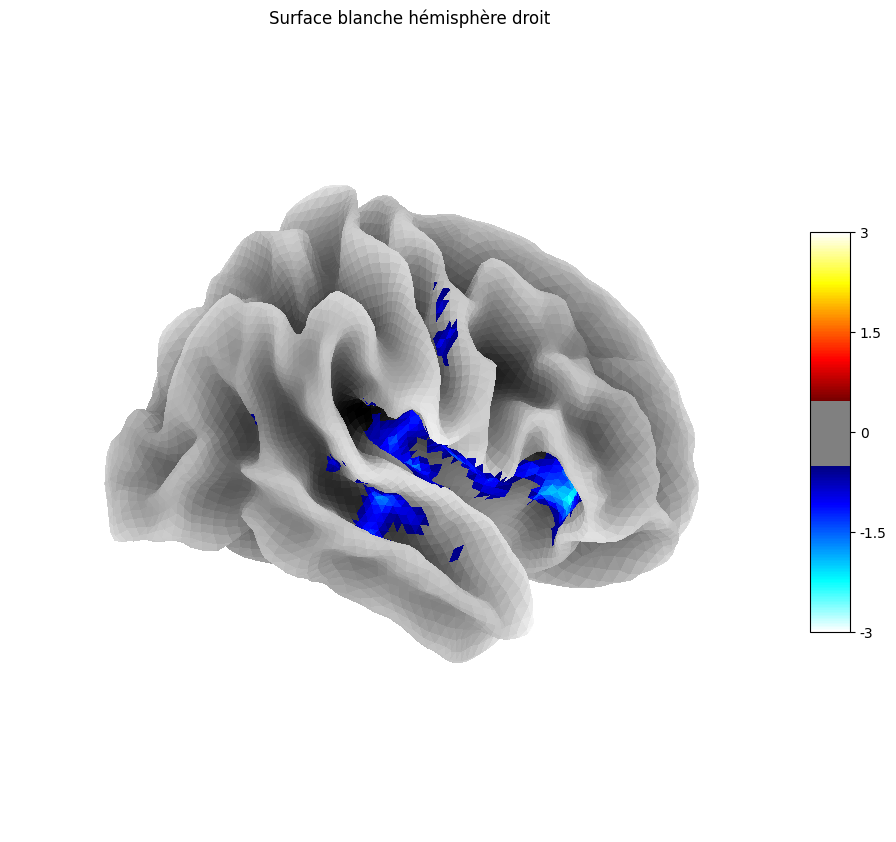

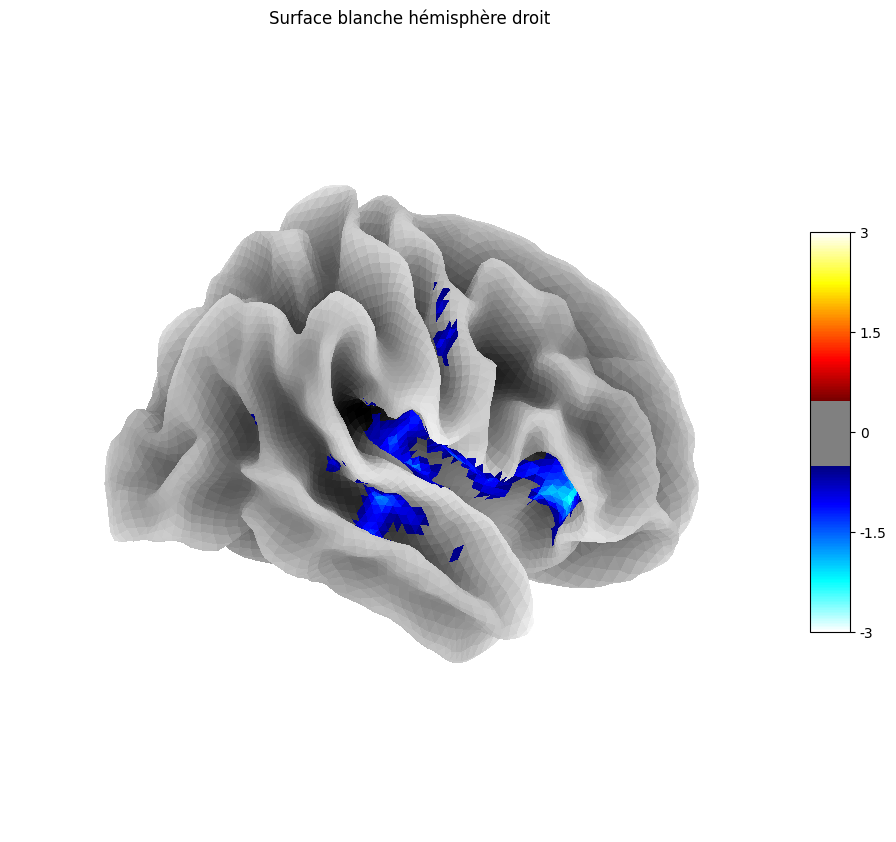

In [6]:
from nilearn import datasets
fsaverage = datasets.fetch_surf_fsaverage()

from nilearn.plotting import plot_surf_stat_map
from nilearn.surface import vol_to_surf
fig = plt.figure(figsize=(10, 8))

texture = vol_to_surf(signed_neg_log_pvals_unmasked, fsaverage.pial_right)

plot_surf_stat_map(fsaverage.white_right, texture, hemi='right', view='lateral',
                            title='Surface blanche hémisphère droit', colorbar=True,
                            threshold=0.5, bg_map=fsaverage.sulc_right,
                            figure=fig)

from myst_nb import glue
glue("surf-stat-fig", fig, display=False)

```{glue:figure} surf-stat-fig
:figwidth: 700px
:name: surf-stat-fig
Projection de la carte statistique présentée à la {numref}`vbm-fig` sur l'atlas de surface corticale `fsaverage`. Cette figure est adaptée d'un tutoriel [Nilearn](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_surf_stat_map.html).
```

Les analyses statistiques fonctionnent exactement de la même façon pour les analyses de surface que pour la VBM.
Mais à la place de faire un test statistique au niveau de chacun des voxels (comme en VBM), on fait maintenant un test pour chacun des vertex (surface).

### Contrôle de qualité
```{figure} ./morphometrie/segmentation-error-surface-fig.png
---
width: 600px
name: segmentation-error-surface-fig
---
Image de gauche: IRM individuelle pondérée en T1.
Image de droite: Extraction de surface automatisée.
Notez que la surface piale ne suit pas correctement l'interface entre la matière grise et le liquide céphalo-rachidien à l'endroit indiqué.
Image sous licence CC Attribution, tirée de Klein et al., 2017 {cite:p}`Klein2017-zh`.
```
La technique d'extraction de surface n'est pas robuste aux effets des volumes partiels.
On pourrait en effet avoir une surface qui ne se rend pas jusqu'au fond d'un sulcus, ou lorsque les gyri sont très rapprochés, qui n'entre même pas à l'intérieur du sulcus.
Le résultat de ces deux types d'erreur, qui sont possibles tant au niveau de la surface piale que de la surface interne, sera une forte surestimation localisée de l'épaisseur corticale.
C'est pourquoi il est souhaitable de procéder à des contrôles de qualité fréquemment sur l'ensemble des images et de corriger les erreurs de segmentation à la main, ou bien d'exclure les données de certains participants.

## Conclusion
Ce chapitre vous a introduit aux différentes familles de techniques de morphologie computationnelle qu'il est possible d'utiliser avec des données acquises en imagerie par résonance magnétique anatomique.
On y a discuté de plusieurs techniques clés d'analyse d'image et l'on a commencé à introduire certains modèles statistiques.


## Références

```{bibliography}
:filter: docname in docnames
```

## Exercices

```{admonition} Exercice 1
:class: note

Pour chacun des énoncés suivants, spécifiez si l'affirmation est vraie ou fausse.
 1. Les mouvements d’un participant de recherche peuvent créer du bruit dans une carte VBM.
 2. La présence de métal peut créer du bruit et des déformations dans une carte VBM.
 3. Un trou dans une carte cérébrale VBM signifie nécessairement qu'il y a un trou dans le cerveau du participant.
```

```{admonition} Exercice 2
:class: note

Pour chacun des énoncés suivants, spécifiez si l'affirmation est vraie ou fausse.
 1. Les données IRM doivent être recalées dans un espace stéréotaxique pour étudier la morphologie du cerveau à l’échelle d’une population en VBM.
 2. Les données IRM doivent être recalées dans un espace stéréotaxique pour effectuer une segmentation manuelle de l’hippocampe.
 3. La VBM repose sur la segmentation automatique de la matière grise dans une IRM.
```

```{admonition} Exercice 3
:class: note

Choisissez la bonne réponse. Des données d’IRM pondérées en T1 pour un participant sont...
 1. Une image 3D d’un cerveau.
 2. Des dizaines d’images 2D sagittales d’un cerveau.
 3. Des dizaines d’images 2D axiales, coronales et sagittales d’un cerveau.
 4. Toutes ces réponses.
```

```{admonition} Exercice 4
:class: note

En vérifiant ses données structurelles, une chercheuse réalise qu’un de ses participants de recherche a un volume cérébral de deux fois supérieur à la normale!
Pourtant, le crâne de ce participant semblait normal.
Proposez une explication.
```

```{admonition} Exercice 5
:class: note

On souhaite faire une comparaison entre la quantité de matière grise présente au niveau du cortex moteur primaire et celle contenue dans le cortex sensoriel primaire, en moyenne, sur une population. Ces deux cortex sont situés très près l’un de l’autre, de part et d’autre du sillon central. On considère pour cela deux méthodes alternatives: une analyse VBM ou bien une analyse de l’épaisseur corticale (analyse de surface).
Quelle technique choisiriez-vous et pourquoi?
```

```{admonition} Exercice 6
:class: note
On souhaite comparer le volume moyen de l’hippocampe droit entre des participants présentant une démence de type Alzheimer et des participants en santé. On fait l’hypothèse que c’est la partie antérieure de l’hippocampe qui présente une différence.
On considère pour cela deux méthodes alternatives: la volumétrie manuelle et l'analyse VBM.
Pour chacune de ces techniques, citez une force et une faiblesse en lien avec les objectifs de l'étude.
```

```{admonition} Exercice 7
:class: note

Pour répondre aux questions de cet exercice, lisez d'abord l'article *Development of cortical thickness and surface area in autism spectrum disorder* de Mensen et collaborateurs (publié en 2017 dans la revue *Neuroimage: Clinical*, volume 13, pages 215 à 222).
Celui-ci est disponible en libre accès à cette [adresse](https://www.sciencedirect.com/science/article/pii/S2213158216302406).
Les questions suivantes requièrent des réponses à développement court.
 - Quelle technique de neuroimagerie est utilisée? S'agit-il d'une technique structurelle ou fonctionnelle?
 - Est ce que le traitement des images inclut une(des) étape(s) de recalage? Si oui, de quel(s) type(s)?
 - Les chercheurs ont-ils mis en place une procédure de contrôle qualité? Si oui, résumez cette procédure.
 - Les régions d'intérêt (ROI) sont-elles définies? Si oui, de quelle façon? Avec quel atlas? Combien y en a-t-il?
 - Quelles mesures morphologiques sont utilisées pour chaque région?
```